
<img src="https://static.wixstatic.com/media/8cb7ea_82957ac107aa4d07a51d503520820f21~mv2.png/v1/fill/w_500,h_438,al_c/8cb7ea_82957ac107aa4d07a51d503520820f21~mv2.png" alt="Tech4Animals Logo" width="250">

[Tech4Animals](https://www.tech4animals.org/)
---



# Animal Facial Landmarks API Documentation



## Overview







This guide provides instructions on how to send an image to our animal facial landmark detector. The service will return the landmarks facial landmarks of animals. The image should be in Base64 format, and the request is made using a JSON payload. Currently the animal facial landmark detector supports cats and dogs (dogs model is still being enhanced and will be updated very soon).

This notebook will explain the needed steps and demonstrate them on an example image.

You can read more about the project in the following paper: https://link.springer.com/article/10.1007/s11263-024-02006-w



## Prerequisites

- `base64`
- `json`
- `requests` OR `curl`

Ensure curl is installed on your system. curl is typically pre-installed on macOS and Linux. On Windows, you might need to install it or use a tool like Git Bash which includes curl.

In [88]:
import base64
import requests
import json

## Steps

### 1. Convert the Image to Base64

The `convert_image_to_base64` function reads the image file in binary mode and encodes its content to a Base64 string.

In [89]:
def convert_image_to_base64(image_path):
  with open(image_path, "rb") as image_file:
    base64_string = base64.b64encode(image_file.read()).decode('utf-8')
  return base64_string

### 2. Create the JSON Payload

The `create_json_payload` function constructs a JSON object with the name field set to the image's filename and the image field set to the Base64-encoded string prefixed with data:image/jpeg;base64,.

In [90]:
def create_json_payload(image_path, image_base64_string):
  payload = {
    "name": image_path.split("/")[-1],  # Extract the filename from the path
    "image": f"data:image/jpeg;base64,{image_base64_string}"
  }
  return json.dumps(payload)

### 3. Send the HTTP POST Request:

The `send_image_for_processing` function sends the JSON payload to the specified URL using an HTTP POST request. It includes appropriate headers and handles the response.

In [91]:
def send_image_for_processing(image_path, url):
  image_base64_string = convert_image_to_base64(image_path)
  request = create_json_payload(image_path, image_base64_string)

  headers = {'Content-Type': 'application/json'}

  response = requests.post(url, data=request, headers=headers)

  if response.status_code == 200:
    print("Image processed successfully!")
    print("Response:", response.json())
    return response.json()
  else:
    print("Failed to process image")

Alternatively, you could can send the request using `curl` from your Command Link / Terminal given the request is ready and saved as `request.json`, using the following command:


```
curl -X POST http://34.165.25.79:6000/landmarks \
     -H "Content-Type: application/json" \
     -d @request.json

```



### Usage Example

Get cat image using a link.

In [ ]:
#@title get cat image

cat_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg" # @param {type:"string"}

# Send a GET request to the URL
response = requests.get(cat_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
  # Open a file in binary write mode and save the image content
  with open("image.jpg", "wb") as f:
    f.write(response.content)
  print("Cat image downloaded successfully!")
else:
  print("Failed to download the cat image.")

Cat image downloaded successfully!


In [92]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [6]:
!git clone https://github.com/geexe/cat-facial-expression-recognition.git

Cloning into 'cat-facial-expression-recognition'...
remote: Enumerating objects: 260, done.
remote: Counting objects: 100% (260/260), done.
remote: Compressing objects: 100% (257/257), done.
remote: Total 260 (delta 4), reused 254 (delta 1), pack-reused 0
Receiving objects: 100% (260/260), 33.51 MiB | 9.75 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [83]:
url = "http://34.165.60.2:6000/landmarks"
image_path = "/content/cat-facial-expression-recognition/Images/Angry/05.jpg"  # Replace with the actual path to your image

# Send the image for processing
result = send_image_for_processing(image_path, url)

Image processed successfully!
Response: [{'cat': {'bbox': {'pul': {'x': 0, 'y': 21}, 'pbr': {'x': 157, 'y': 213}, 'label': 'cat', 'score': 0.8970754146575928}, 'landmarks': [{'x': 68, 'y': 187, 'label': 'part0', 'score': '1.00'}, {'x': 90, 'y': 142, 'label': 'part1', 'score': '1.00'}, {'x': 66, 'y': 192, 'label': 'part2', 'score': '1.00'}, {'x': 52, 'y': 135, 'label': 'part3', 'score': '1.00'}, {'x': 43, 'y': 127, 'label': 'part4', 'score': '1.00'}, {'x': 61, 'y': 139, 'label': 'part5', 'score': '1.00'}, {'x': 53, 'y': 126, 'label': 'part6', 'score': '1.00'}, {'x': 51, 'y': 140, 'label': 'part7', 'score': '1.00'}, {'x': 100, 'y': 136, 'label': 'part8', 'score': '1.00'}, {'x': 83, 'y': 143, 'label': 'part9', 'score': '1.00'}, {'x': 91, 'y': 131, 'label': 'part10', 'score': '1.00'}, {'x': 90, 'y': 148, 'label': 'part11', 'score': '1.00'}, {'x': 67, 'y': 167, 'label': 'part12', 'score': '1.00'}, {'x': 76, 'y': 170, 'label': 'part13', 'score': '1.00'}, {'x': 61, 'y': 169, 'label': 'part14'

#### Print the image with the landmarks

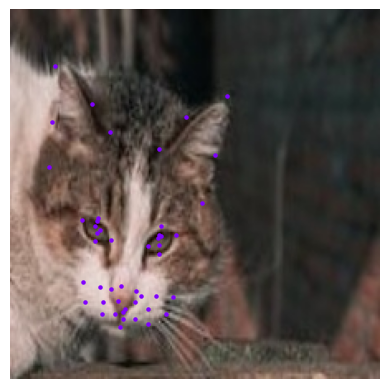

In [84]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import matplotlib.cm as cm
import numpy as np
import math

image = Image.open(image_path)
# Create a figure and axis
fig, ax = plt.subplots()
# Display the image
ax.imshow(image)
# Define the number of distinct animals
num_animals = len(result)
cmap = plt.colormaps['rainbow']

# Iterate over the result to plot landmarks with different colors
for i, animal_data in enumerate(result):
  for animal, details in animal_data.items():
    color = cmap(i / num_animals)  # Get a color from the colormap
    landmarks = details['landmarks']
    for landmark in landmarks:
      x = landmark['x']
      y = landmark['y']
      ax.scatter(x, y, color=color, s=5)  # Plot the point with the color from the colormap

plt.axis('off')
# Show the plot
plt.show()

In [ ]:
#kaggle datasets download -d georgemartvel/catflw

Image processed successfully!
Response: [{'cat': {'bbox': {'pul': {'x': 0, 'y': 0}, 'pbr': {'x': 220, 'y': 205}, 'label': 'cat', 'score': 0.9058096408843994}, 'landmarks': [{'x': 65, 'y': 165, 'label': 'part0', 'score': '1.00'}, {'x': 108, 'y': 136, 'label': 'part1', 'score': '1.00'}, {'x': 63, 'y': 172, 'label': 'part2', 'score': '1.00'}, {'x': 47, 'y': 110, 'label': 'part3', 'score': '1.00'}, {'x': 39, 'y': 96, 'label': 'part4', 'score': '1.00'}, {'x': 59, 'y': 116, 'label': 'part5', 'score': '1.00'}, {'x': 56, 'y': 93, 'label': 'part6', 'score': '1.00'}, {'x': 44, 'y': 117, 'label': 'part7', 'score': '1.00'}, {'x': 125, 'y': 131, 'label': 'part8', 'score': '1.00'}, {'x': 95, 'y': 126, 'label': 'part9', 'score': '1.00'}, {'x': 117, 'y': 115, 'label': 'part10', 'score': '1.00'}, {'x': 106, 'y': 141, 'label': 'part11', 'score': '1.00'}, {'x': 65, 'y': 142, 'label': 'part12', 'score': '1.00'}, {'x': 77, 'y': 147, 'label': 'part13', 'score': '1.00'}, {'x': 59, 'y': 145, 'label': 'part14'

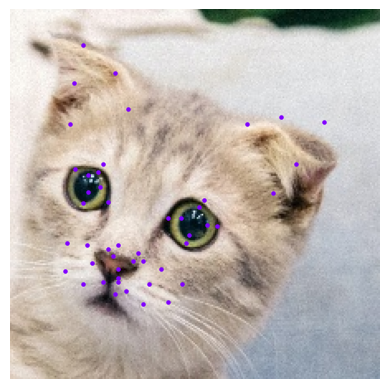

      x    y   label score
0    65  165   part0  1.00
1   108  136   part1  1.00
2    63  172   part2  1.00
3    47  110   part3  1.00
4    39   96   part4  1.00
5    59  116   part5  1.00
6    56   93   part6  1.00
7    44  117   part7  1.00
8   125  131   part8  1.00
9    95  126   part9  1.00
10  117  115  part10  1.00
11  106  141  part11  1.00
12   65  142  part12  1.00
13   77  147  part13  1.00
14   59  145  part14  1.00
15   80  152  part15  1.00
16   65  157  part16  1.00
17   65  162  part17  1.00
18   70  170  part18  1.00
19   80  178  part19  1.00
20   56  165  part20  1.00
21   44  166  part21  1.00
22   36   69  part22  1.00
23   38   44  part23  1.00
24   44   21  part24  1.00
25   63   38  part25  1.00
26   71   60  part26  1.00
27  159  111  part27  1.00
28  173   93  part28  1.00
29  190   68  part29  1.00
30  164   65  part30  1.00
31  143   69  part31  1.00
32   34  141  part32  1.00
33   49  153  part33  1.00
34   84  166  part34  1.00
35  104  166  part35  1.00
3

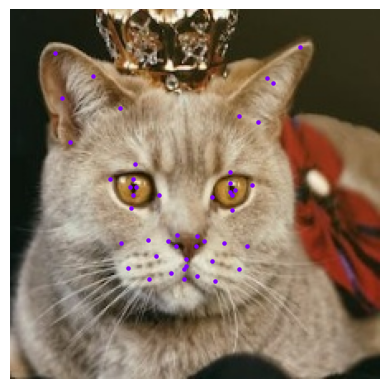

      x    y   label score
0   105  157   part0  1.00
1   134  112   part1  1.00
2   105  163   part2  1.00
3    74  112   part3  1.00
4    60  102   part4  1.00
5    90  112   part5  1.00
6    75   93   part6  1.00
7    73  120   part7  1.00
8   146  106   part8  1.00
9   122  113   part9  1.00
10  133   98  part10  1.00
11  134  121  part11  1.00
12  101  136  part12  1.00
13  113  137  part13  1.00
14   95  140  part14  1.00
15  117  140  part15  1.00
16  106  151  part16  1.00
17  106  155  part17  1.00
18  113  161  part18  1.00
19  124  164  part19  1.00
20   97  159  part20  1.00
21   84  163  part21  1.00
22   36   80  part22  1.00
23   31   53  part23  1.00
24   27   26  part24  1.00
25   50   40  part25  1.00
26   66   59  part26  1.00
27  138   64  part27  1.00
28  155   41  part28  1.00
29  175   22  part29  1.00
30  159   44  part30  1.00
31  150   68  part31  1.00
32   67  141  part32  1.00
33   88  149  part33  1.00
34  122  152  part34  1.00
35  143  143  part35  1.00
3

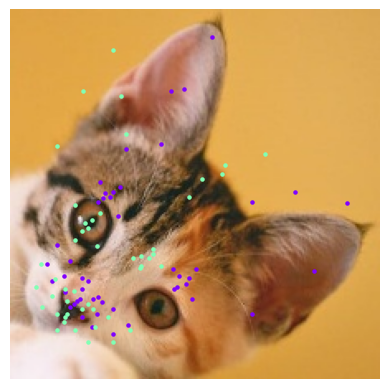

      x    y   label score
0    38  178   part0  1.00
1   101  168   part1  1.00
2    36  180   part2  1.00
3    56  114   part3  1.00
4    54  104   part4  1.00
5    65  125   part5  1.00
6    66  107   part6  1.00
7    53  116   part7  1.00
8   110  175   part8  1.00
9    98  157   part9  1.00
10  112  157  part10  1.00
11   99  169  part11  1.00
12   47  164  part12  1.00
13   53  174  part13  1.00
14   43  162  part14  1.00
15   55  177  part15  1.00
16   42  175  part16  1.00
17   40  176  part17  1.00
18   43  186  part18  1.00
19   49  192  part19  1.00
20   33  171  part20  1.00
21   25  164  part21  1.00
22   70   84  part22  1.00
23   97   49  part23  1.00
24  122   16  part24  1.00
25  105   48  part25  1.00
26   91   81  part26  1.00
27  146  184  part27  1.00
28  184  158  part28  1.00
29  204  117  part29  1.00
30  172  110  part30  1.00
31  146  116  part31  1.00
32   28  142  part32  1.00
33   32  161  part33  1.00
34   52  184  part34  1.00
35   71  191  part35  1.00
3

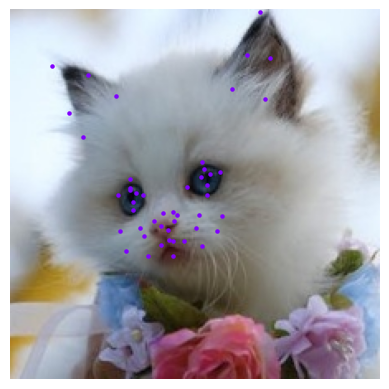

      x    y   label score
0    98  140   part0  1.00
1   119  106   part1  1.00
2    98  149   part2  1.00
3    74  116   part3  1.00
4    65  112   part4  1.00
5    80  112   part5  1.00
6    72  102   part6  1.00
7    74  121   part7  1.00
8   127   98   part8  1.00
9   107  107   part9  1.00
10  116   92  part10  1.00
11  119  112  part11  1.00
12   92  123  part12  1.00
13   98  122  part13  1.00
14   87  128  part14  1.00
15  101  124  part15  1.00
16   95  133  part16  1.00
17   96  139  part17  1.00
18  105  140  part18  1.00
19  116  143  part19  1.00
20   91  142  part20  1.00
21   83  149  part21  1.00
22   64   52  part22  1.00
23   47   39  part23  1.00
24   25   34  part24  1.00
25   35   62  part25  1.00
26   44   77  part26  1.00
27  154   54  part27  1.00
28  157   29  part28  1.00
29  151    1  part29  1.00
30  143   27  part30  1.00
31  134   48  part31  1.00
32   66  134  part32  1.00
33   81  137  part33  1.00
34  112  132  part34  1.00
35  128  125  part35  1.00
3

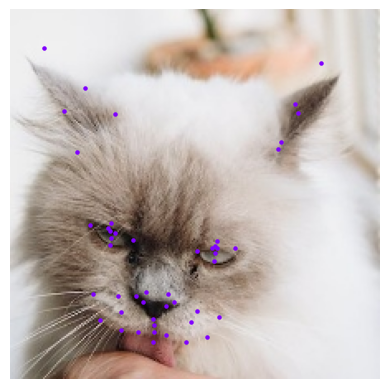

      x    y   label score
0    87  195   part0  1.00
1   124  147   part1  1.00
2    86  201   part2  1.00
3    61  138   part3  1.00
4    48  130   part4  1.00
5    74  139   part5  1.00
6    61  129   part6  1.00
7    60  142   part7  1.00
8   136  144   part8  1.00
9   113  146   part9  1.00
10  125  140  part10  1.00
11  123  152  part11  1.00
12   82  171  part12  1.00
13   95  172  part13  1.00
14   76  173  part14  1.00
15   99  177  part15  1.00
16   86  187  part16  1.00
17   87  191  part17  1.00
18   94  197  part18  1.00
19  106  201  part19  1.00
20   77  195  part20  1.00
21   67  194  part21  1.00
22   63   63  part22  1.00
23   45   47  part23  1.00
24   20   23  part24  1.00
25   32   61  part25  1.00
26   40   86  part26  1.00
27  164   80  part27  1.00
28  172   57  part28  1.00
29  188   32  part29  1.00
30  174   62  part30  1.00
31  162   84  part31  1.00
32   50  172  part32  1.00
33   67  183  part33  1.00
34  109  189  part34  1.00
35  126  186  part35  1.00
3

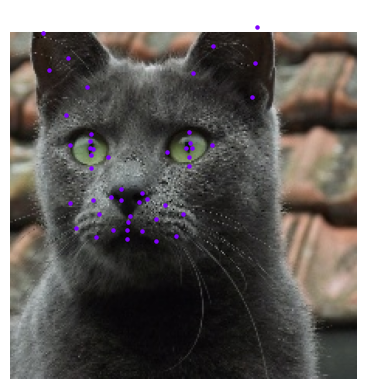

      x    y   label score
0    75  127   part0  1.00
1   115   80   part1  1.00
2    75  133   part2  1.00
3    52   79   part3  1.00
4    38   72   part4  1.00
5    63   80   part5  1.00
6    52   65   part6  1.00
7    52   87   part7  1.00
8   130   72   part8  1.00
9   101   77   part9  1.00
10  115   64  part10  1.00
11  115   86  part11  1.00
12   71  101  part12  1.00
13   85  103  part13  1.00
14   65  106  part14  1.00
15   88  107  part15  1.00
16   77  118  part16  1.00
17   76  122  part17  1.00
18   85  128  part18  1.00
19   94  134  part19  1.00
20   66  127  part20  1.00
21   55  132  part21  1.00
22   36   53  part22  1.00
23   25   24  part23  1.00
24   21    0  part24  1.00
25   37   16  part25  1.00
26   49   35  part26  1.00
27  118   26  part27  1.00
28  131    8  part28  1.00
29  159   -4  part29  1.00
30  158   19  part30  1.00
31  156   41  part31  1.00
32   38  110  part32  1.00
33   57  117  part33  1.00
34   94  120  part34  1.00
35  111  117  part35  1.00
3

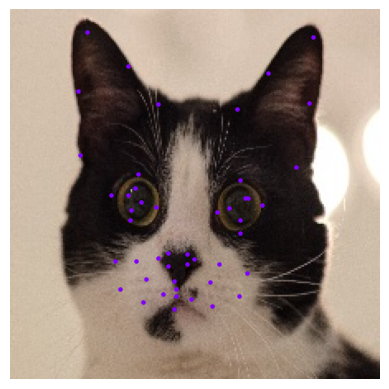

      x    y   label score
0   100  173   part0  1.00
1   139  127   part1  1.00
2    99  181   part2  1.00
3    73  121   part3  1.00
4    61  112   part4  1.00
5    88  119   part5  1.00
6    77   99   part6  1.00
7    72  127   part7  1.00
8   152  118   part8  1.00
9   125  122   part9  1.00
10  139  103  part10  1.00
11  139  135  part11  1.00
12   95  147  part12  1.00
13  107  148  part13  1.00
14   89  150  part14  1.00
15  111  151  part15  1.00
16   99  164  part16  1.00
17  100  169  part17  1.00
18  109  175  part18  1.00
19  122  179  part19  1.00
20   92  172  part20  1.00
21   80  177  part21  1.00
22   42   88  part22  1.00
23   41   49  part23  1.00
24   46   13  part24  1.00
25   71   34  part25  1.00
26   89   57  part26  1.00
27  173   95  part27  1.00
28  181   56  part28  1.00
29  183   16  part29  1.00
30  156   38  part30  1.00
31  137   60  part31  1.00
32   63  152  part32  1.00
33   82  163  part33  1.00
34  121  165  part34  1.00
35  143  159  part35  1.00
3

In [85]:
cordinate_list = []              #List for cordinate by each picture

for a in [1,6,7,11,21,36,37]:  # This will iterate over 3, 4, 5
    # Construct the file path using the current index
    image_path = f"/content/cat-facial-expression-recognition/Images/Sad/{a:03d}.jpg"   # {a:02d}
    # Here you can perform any action with the image_path
    url = "http://34.165.60.2:6000/landmarks"

    # Send the image for processing
    result = send_image_for_processing(image_path, url)
    image = Image.open(image_path)
    # Create a figure and axis
    fig, ax = plt.subplots()
    # Display the image
    ax.imshow(image)
    # Define the number of distinct animals
    num_animals = len(result)
    cmap = plt.colormaps['rainbow']

    # Iterate over the result to plot landmarks with different colors
    for i, animal_data in enumerate(result):
      for animal, details in animal_data.items():
        color = cmap(i / num_animals)  # Get a color from the colormap
        landmarks = details['landmarks']
        for landmark in landmarks:
          x = landmark['x']
          y = landmark['y']
          ax.scatter(x, y, color=color, s=5)  # Plot the point with the color from the colormap

    plt.axis('off')
    # Show the plot
    plt.show()

    response = requests.post(url, data=create_json_payload(image_path, convert_image_to_base64(image_path))
                         , headers={'Content-Type': 'application/json'})

    landmarks = response.json()[0]['cat']['landmarks']

    # Create a DataFrame
    df = pd.DataFrame(landmarks)
    cordinate_list.append(df)

    # Display the DataFrame
    print(df)



In [72]:
x_mid_left_eye = (cordinate_list[0].loc[31-1, 'x'] + cordinate_list[0].loc[38-1, 'x'])/2
y_mid_left_eye = (cordinate_list[0].loc[31-1, 'y'] + cordinate_list[0].loc[38-1, 'y'])/2
print(y_mid_left_eye)

86.0


# Create cordinate of each concern point

In [73]:
def middle_right_eye(picture): #Input your picture number (Ex. 1)
    x_mid_right_eye = (cordinate_list[picture].loc[37-1, 'x'] + cordinate_list[picture].loc[38-1, 'x'])/2
    y_mid_right_eye = (cordinate_list[picture].loc[37-1, 'y'] + cordinate_list[picture].loc[38-1, 'y'])/2

    return (x_mid_right_eye, y_mid_right_eye)

def middle_left_eye(picture):
    x_mid_left_eye = (cordinate_list[picture].loc[41-1, 'x'] + cordinate_list[picture].loc[42-1, 'x'])/2
    y_mid_left_eye = (cordinate_list[picture].loc[41-1, 'y'] + cordinate_list[picture].loc[42-1, 'y'])/2

    return (x_mid_left_eye, y_mid_left_eye)

def middle_nose(picture):
    x_mid_nose = cordinate_list[picture].loc[17-1, 'x']
    y_mid_nose = cordinate_list[picture].loc[17-1, 'y']

    return (x_mid_nose, y_mid_nose)

def middle_forehead(picture):
    x_mid_forehead = (cordinate_list[picture].loc[27-1, 'x'] + cordinate_list[picture].loc[28-1, 'x'])/2
    y_mid_forehead = (cordinate_list[picture].loc[27-1, 'y'] + cordinate_list[picture].loc[28-1, 'y'])/2

    return (x_mid_forehead, y_mid_forehead)

def middle_left_ear(picture):
    x_mid_ear = (cordinate_list[picture].loc[23-1, 'x'] + cordinate_list[picture].loc[24-1, 'x'] + cordinate_list[picture].loc[25-1, 'x']
                + cordinate_list[picture].loc[26-1, 'x'] + cordinate_list[picture].loc[27-1, 'x'])/5
    y_mid_ear = (cordinate_list[picture].loc[23-1, 'y'] + cordinate_list[picture].loc[24-1, 'y'] + cordinate_list[picture].loc[25-1, 'y']
                 + cordinate_list[picture].loc[26-1, 'y'] + cordinate_list[picture].loc[27-1, 'y'])/5

    return (x_mid_ear, y_mid_ear)

def middle_right_ear(picture):
    x_mid_ear = (cordinate_list[picture].loc[28-1, 'x'] + cordinate_list[picture].loc[29-1, 'x'] + cordinate_list[picture].loc[30-1, 'x']
                + cordinate_list[picture].loc[31-1, 'x'] + cordinate_list[picture].loc[32-1, 'x'])/5
    y_mid_ear = (cordinate_list[picture].loc[28-1, 'y'] + cordinate_list[picture].loc[29-1, 'y'] + cordinate_list[picture].loc[30-1, 'y']
                 + cordinate_list[picture].loc[31-1, 'y'] + cordinate_list[picture].loc[32-1, 'y'])/5

    return (x_mid_ear, y_mid_ear)

In [74]:
middle_right_eye(0)

(53.5, 102.5)

# Create feature of each Picture

In [75]:
def dist_between_LReyes(picture):
    a = middle_right_eye(picture)[0]- middle_left_eye(picture)[0]
    b = middle_right_eye(picture)[1]- middle_left_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist

def dist_between_LRear(picture):
    a = middle_left_ear(picture)[0]- middle_right_ear(picture)[0]
    b = middle_left_ear(picture)[1]- middle_right_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist

def angle_between_nose_Leye(picture):
    a = middle_left_eye(picture)[0] - middle_nose(picture)[0]
    b = middle_left_eye(picture)[1] - middle_nose(picture)[1]
    angle_radians = math.atan2(b, a)
    final_angle = math.degrees(angle_radians)
    return final_angle

def angle_between_nose_Reye(picture):
    a = middle_right_eye(picture)[0] - middle_nose(picture)[0]
    b = middle_right_eye(picture)[1] - middle_nose(picture)[1]
    angle_radians = math.atan2(b, a)
    final_angle = math.degrees(angle_radians)
    return final_angle

def angle_between_nose_Rear(picture):
    a = middle_right_ear(picture)[0] - middle_nose(picture)[0]
    b = middle_right_ear(picture)[1] - middle_nose(picture)[1]
    angle_radians = math.atan2(b, a)
    final_angle = math.degrees(angle_radians)
    return final_angle

def angle_between_nose_Lear(picture):
    a = middle_left_ear(picture)[0] - middle_nose(picture)[0]
    b = middle_left_ear(picture)[1] - middle_nose(picture)[1]
    angle_radians = math.atan2(b, a)
    final_angle = math.degrees(angle_radians)
    return final_angle

# Distance between each point and the middlhe point of their region

In [76]:
#L_Ear_Region
def dist_point1_to_Lear(picture) :
    a = cordinate_list[picture].loc[23-1, 'x'] - middle_left_ear(picture)[0]
    b = cordinate_list[picture].loc[23-1, 'y'] - middle_left_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point2_to_Lear(picture) :
    a = cordinate_list[picture].loc[24-1, 'x'] - middle_left_ear(picture)[0]
    b = cordinate_list[picture].loc[24-1, 'y'] - middle_left_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point3_to_Lear(picture) :
    a = cordinate_list[picture].loc[25-1, 'x'] - middle_left_ear(picture)[0]
    b = cordinate_list[picture].loc[25-1, 'y'] - middle_left_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point4_to_Lear(picture) :
    a = cordinate_list[picture].loc[26-1, 'x'] - middle_left_ear(picture)[0]
    b = cordinate_list[picture].loc[26-1, 'y'] - middle_left_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point5_to_Lear(picture) :
    a = cordinate_list[picture].loc[27-1, 'x'] - middle_left_ear(picture)[0]
    b = cordinate_list[picture].loc[27-1, 'y'] - middle_left_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist

In [77]:
#R_Ear_Region
def dist_point1_to_Rear(picture) :
    a = cordinate_list[picture].loc[28-1, 'x'] - middle_right_ear(picture)[0]
    b = cordinate_list[picture].loc[28-1, 'y'] - middle_right_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point2_to_Rear(picture) :
    a = cordinate_list[picture].loc[29-1, 'x'] - middle_right_ear(picture)[0]
    b = cordinate_list[picture].loc[29-1, 'y'] - middle_right_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point3_to_Rear(picture) :
    a = cordinate_list[picture].loc[30-1, 'x'] - middle_right_ear(picture)[0]
    b = cordinate_list[picture].loc[30-1, 'y'] - middle_right_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point4_to_Rear(picture) :
    a = cordinate_list[picture].loc[31-1, 'x'] - middle_right_ear(picture)[0]
    b = cordinate_list[picture].loc[31-1, 'y'] - middle_right_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point5_to_Rear(picture) :
    a = cordinate_list[picture].loc[32-1, 'x'] - middle_right_ear(picture)[0]
    b = cordinate_list[picture].loc[32-1, 'y'] - middle_right_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist

In [78]:
#L_eye_Region
def dist_point1_to_Leye(picture) :
    a = cordinate_list[picture].loc[4-1, 'x'] - middle_left_eye(picture)[0]
    b = cordinate_list[picture].loc[4-1, 'y'] - middle_left_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point2_to_Leye(picture) :
    a = cordinate_list[picture].loc[5-1, 'x'] - middle_left_eye(picture)[0]
    b = cordinate_list[picture].loc[5-1, 'y'] - middle_left_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point3_to_Leye(picture) :
    a = cordinate_list[picture].loc[6-1, 'x'] - middle_left_eye(picture)[0]
    b = cordinate_list[picture].loc[6-1, 'y'] - middle_left_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point4_to_Leye(picture) :
    a = cordinate_list[picture].loc[7-1, 'x'] - middle_left_eye(picture)[0]
    b = cordinate_list[picture].loc[7-1, 'y'] - middle_left_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point5_to_Leye(picture) :
    a = cordinate_list[picture].loc[8-1, 'x'] - middle_left_eye(picture)[0]
    b = cordinate_list[picture].loc[8-1, 'y'] - middle_left_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist


In [79]:
#R_eye_Region
def dist_point1_to_Reye(picture) :
    a = cordinate_list[picture].loc[2-1, 'x'] - middle_right_eye(picture)[0]
    b = cordinate_list[picture].loc[2-1, 'y'] - middle_right_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point2_to_Reye(picture) :
    a = cordinate_list[picture].loc[9-1, 'x'] - middle_right_eye(picture)[0]
    b = cordinate_list[picture].loc[9-1, 'y'] - middle_right_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point3_to_Reye(picture) :
    a = cordinate_list[picture].loc[10-1, 'x'] - middle_right_eye(picture)[0]
    b = cordinate_list[picture].loc[10-1, 'y'] - middle_right_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point4_to_Reye(picture) :
    a = cordinate_list[picture].loc[11-1, 'x'] - middle_right_eye(picture)[0]
    b = cordinate_list[picture].loc[11-1, 'y'] - middle_right_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point5_to_Reye(picture) :
    a = cordinate_list[picture].loc[12-1, 'x'] - middle_right_eye(picture)[0]
    b = cordinate_list[picture].loc[12-1, 'y'] - middle_right_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist

In [80]:
#Nose_Region
def dist_point1_to_nose(picture) :
    a = cordinate_list[picture].loc[33-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[33-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point2_to_nose(picture) :
    a = cordinate_list[picture].loc[43-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[43-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point3_to_nose(picture) :
    a = cordinate_list[picture].loc[15-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[15-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point4_to_nose(picture) :
    a = cordinate_list[picture].loc[16-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[16-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point5_to_nose(picture) :
    a = cordinate_list[picture].loc[44-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[44-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point6_to_nose(picture) :
    a = cordinate_list[picture].loc[36-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[36-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point7_to_nose(picture) :
    a = cordinate_list[picture].loc[47-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[47-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point8_to_nose(picture) :
    a = cordinate_list[picture].loc[34-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[34-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point9_to_nose(picture) :
    a = cordinate_list[picture].loc[35-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[35-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point10_to_nose(picture) :
    a = cordinate_list[picture].loc[48-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[48-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point11_to_nose(picture) :
    a = cordinate_list[picture].loc[22-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[22-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point12_to_nose(picture) :
    a = cordinate_list[picture].loc[21-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[21-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point13_to_nose(picture) :
    a = cordinate_list[picture].loc[1-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[1-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point14_to_nose(picture) :
    a = cordinate_list[picture].loc[19-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[19-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist
def dist_point15_to_nose(picture) :
    a = cordinate_list[picture].loc[20-1, 'x'] - middle_nose(picture)[0]
    b = cordinate_list[picture].loc[20-1, 'y'] - middle_nose(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist



# Create Dataframe by feature of each Picture

In [86]:
final_df = pd.DataFrame({'Picture' : [],'dist_between_LReyes': [], 'dist_between_LRear': [],'angle_between_nose_Leye' : [], 'angle_between_nose_Reye' : []
                         , 'angle_between_nose_Lear' : [], 'angle_between_nose_Rear' : [], 'dist_point1_to_Lear': [], 'dist_point2_to_Lear' :[], 'dist_point3_to_Lear' :[]
                         , 'dist_point4_to_Lear' : [], 'dist_point5_to_Lear': [], 'dist_point1_to_Rear': [], 'dist_point2_to_Rear' :[], 'dist_point3_to_Rear' :[]
                         , 'dist_point4_to_Rear' : [], 'dist_point5_to_Rear' : [], 'dist_point1_to_Leye': [], 'dist_point2_to_Leye' :[], 'dist_point3_to_Leye' :[]
                         , 'dist_point4_to_Leye' :[], 'dist_point5_to_Leye':[], 'dist_point1_to_Reye': [], 'dist_point2_to_Reye' :[], 'dist_point3_to_Reye' :[]
                         , 'dist_point4_to_Reye' :[], 'dist_point5_to_Reye':[], 'dist_point1_to_nose':[], 'dist_point2_to_nose' :[], 'dist_point3_to_nose':[]
                         , 'dist_point4_to_nose' :[], 'dist_point5_to_nose':[], 'dist_point6_to_nose':[], 'dist_point7_to_nose':[], 'dist_point8_to_nose':[]
                         , 'dist_point9_to_nose':[], 'dist_point10_to_nose':[], 'dist_point11_to_nose':[], 'dist_point12_to_nose':[], 'dist_point13_to_nose':[]
                         , 'dist_point14_to_nose' :[], 'dist_point15_to_nose' : []
                        })
for i in range(7):
    # New row data as a dictionary
    new_row = {'Picture': i+1, 'dist_between_LReyes': dist_between_LReyes(i), 'dist_between_LRear': dist_between_LRear(i), 'angle_between_nose_Leye' :angle_between_nose_Leye(i)
                , 'angle_between_nose_Reye': angle_between_nose_Reye(i), 'angle_between_nose_Lear' : angle_between_nose_Lear(i), 'angle_between_nose_Rear' : angle_between_nose_Rear(i)
                , 'dist_point1_to_Lear' : dist_point1_to_Lear(i),'dist_point2_to_Lear' : dist_point2_to_Lear(i), 'dist_point3_to_Lear' : dist_point3_to_Lear(i)
                , 'dist_point4_to_Lear' : dist_point4_to_Lear(i), 'dist_point5_to_Lear' : dist_point5_to_Lear(i), 'dist_point1_to_Rear' : dist_point1_to_Rear(i)
                , 'dist_point2_to_Rear' : dist_point2_to_Rear(i), 'dist_point3_to_Rear' : dist_point3_to_Rear(i), 'dist_point4_to_Rear' :dist_point4_to_Rear(i)
                , 'dist_point5_to_Rear' : dist_point5_to_Rear(i), 'dist_point1_to_Leye' : dist_point1_to_Leye(i), 'dist_point2_to_Leye' : dist_point2_to_Leye(i)
                , 'dist_point3_to_Leye' : dist_point3_to_Leye(i), 'dist_point4_to_Leye' : dist_point4_to_Leye(i), 'dist_point5_to_Leye' : dist_point5_to_Leye(i)
                , 'dist_point1_to_Reye' : dist_point1_to_Reye(i), 'dist_point2_to_Reye' : dist_point2_to_Reye(i), 'dist_point3_to_Reye' : dist_point3_to_Reye(i)
                , 'dist_point4_to_Reye' : dist_point4_to_Reye(i), 'dist_point5_to_Reye' : dist_point5_to_Reye(i), 'dist_point1_to_nose' : dist_point1_to_nose(i)
                , 'dist_point2_to_nose' : dist_point2_to_nose(i), 'dist_point3_to_nose' : dist_point3_to_nose(i), 'dist_point4_to_nose' : dist_point4_to_nose(i)
                , 'dist_point5_to_nose': dist_point5_to_nose(i), 'dist_point6_to_nose': dist_point6_to_nose(i), 'dist_point7_to_nose': dist_point7_to_nose(i)
                , 'dist_point8_to_nose': dist_point8_to_nose(i), 'dist_point9_to_nose': dist_point9_to_nose(i), 'dist_point10_to_nose': dist_point10_to_nose(i)
                , 'dist_point11_to_nose': dist_point11_to_nose(i), 'dist_point12_to_nose': dist_point12_to_nose(i), 'dist_point13_to_nose': dist_point13_to_nose(i)
                , 'dist_point14_to_nose': dist_point14_to_nose(i), 'dist_point15_to_nose': dist_point15_to_nose(i)
              }

    #print(i, dist_between_LReyes(i), dist_between_LRear(i), angle_between_nose_Leye(i))

    # Converting dictionary to DataFrame for the new row
    new_row_df = pd.DataFrame([new_row])

    # Using pd.concat to add the new row
    final_df = pd.concat([final_df, new_row_df], ignore_index=True)

print(final_df)

   Picture  dist_between_LReyes  dist_between_LRear  angle_between_nose_Leye  \
0      1.0            58.523500          120.532983               -38.418055   
1      2.0            59.002119          113.463651               -58.172553   
2      3.0            66.603303          109.606204               -12.094757   
3      4.0            45.122057          106.883301               -55.124672   
4      5.0            62.723600          132.185476               -48.908544   
5      6.0            62.500000          111.060344               -50.505478   
6      7.0            62.072538          108.306417               -51.044092   

   angle_between_nose_Reye  angle_between_nose_Lear  angle_between_nose_Rear  \
0              -101.915147               -97.519978               -36.942585   
1              -126.027373              -122.775994               -64.420393   
2               -73.342154               -65.267477               -16.486128   
3              -132.397438             

In [87]:
final_df.to_excel('cat_df_Sad.xlsx', index=False)

# No Use

In [ ]:
# Sample function that returns an integer
def dist_between_LReyes(picture):
    a = middle_right_eye(picture)[0]- middle_left_eye(picture)[0]
    b = middle_right_eye(picture)[1]- middle_left_eye(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist

def dist_between_LRear(picture):
    a = middle_left_ear(picture)[0]- middle_right_ear(picture)[0]
    b = middle_left_ear(picture)[1]- middle_right_ear(picture)[1]
    final_dist = math.sqrt((a**2)+(b**2))
    return final_dist

# Sample DataFrame
final_df = pd.DataFrame({'Picture' : [],'dist_between_LReyes': [], 'dist_between_LRear': []})

# New row data as a dictionary
new_row = {'Picture': 0, 'dist_between_LReyes': dist_between_LReyes(0), 'dist_between_LRear': dist_between_LRear(0)}

# Converting dictionary to DataFrame
new_row_df = pd.DataFrame([new_row])

# Using pd.concat to add the new row
final_df = pd.concat([final_df, new_row_df], ignore_index=True)

print(final_df)

   Picture  dist_between_LReyes  dist_between_LRear
0      0.0            60.632087          113.450959


In [ ]:
cordinate_list[0]

,x,y,label,score
0,117,184,part0,1.00
1,145,129,part1,1.00
2,118,187,part2,1.00
3,83,133,part3,1.00
4,71,129,part4,1.00
5,96,133,part5,1.00
6,81,124,part6,1.00
7,83,139,part7,1.00
8,156,122,part8,1.00
9,133,131,part9,1.00


In [ ]:
cordinate_list[0].loc[0, 'x']

117